# for 2022.10.03, we will observe back-up for the first few hours and then switch to main program

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from astropy import coordinates
from astropy import units as u
from skipper import observe, planner

In [3]:
import sys
sys.path.append('../scripts/')

In [4]:
import sigjson_f2022b
import our_pointings

In [5]:
obsdates = sigjson_f2022b.obsdates

obskeys = [ f'{x[0]:02d}-{x[1]:02d}-{x[2]:02d}' for x in obsdates[:,:3]]

def wrapRA(ra, wrap_point=180.):
    mask = ra >= wrap_point
    wrapped_ra = ra.copy()
    wrapped_ra[mask] -= 360.
    return wrapped_ra

In [6]:
tele_fname = '/Users/kadofong/Downloads/tele20221002.csv'
copilot_fname = '/Users/kadofong/Downloads/db_merian.fits'

In [7]:
obsdates = sigjson_f2022b.obsdates
obsfilters = sigjson_f2022b.obsfilters

oiii_nights = obsdates[obsfilters == 'N540', :-1]
halpha_nights = obsdates[obsfilters=='N708',:-1]

In [8]:
hcat, ocat = our_pointings.load_fallfields ()

coo_o = observe.CopilotOutput ( copilot_fname, ocat, skySB_0=22.1 )
coo_h = observe.CopilotOutput ( copilot_fname, hcat, skySB_0=21. )

# Check coverage

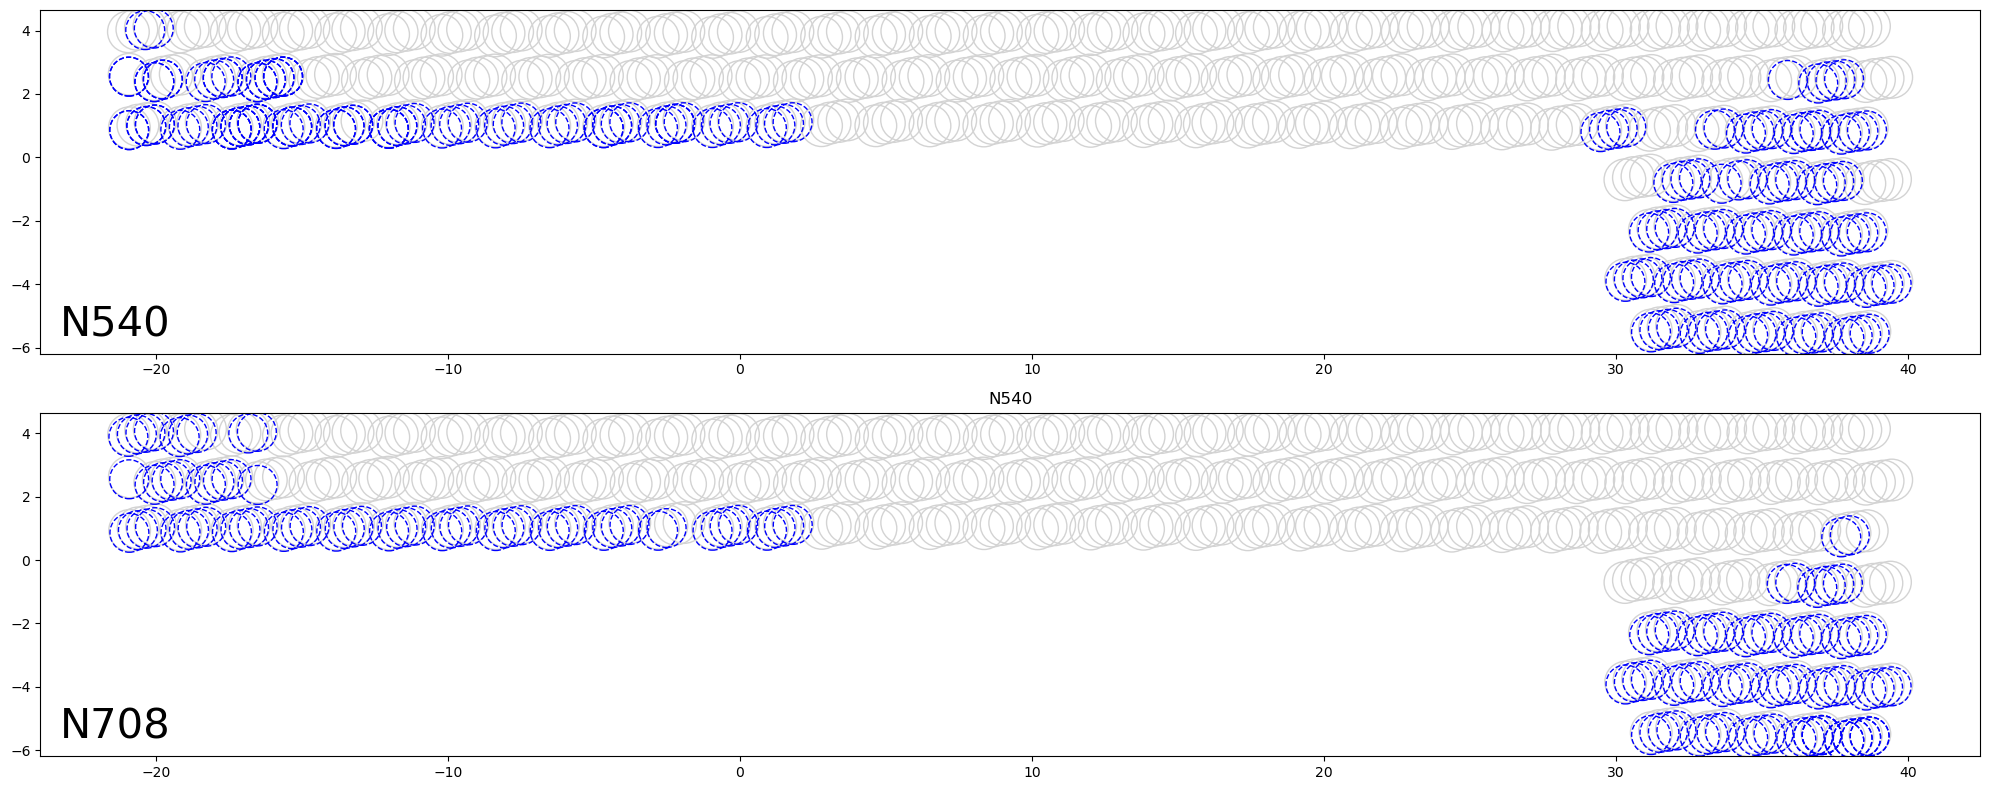

In [9]:
fig, axarr = plt.subplots(2,1,figsize=(20,8))

fields = ocat['object'].str.extract(r'(.*?(?=_))')[0]
cc_l = ['#abb7ff','#abffeb','#abffcb','#feffab','#ffcbab','lightgrey']
filters = ['N540','N708']
teff_min = [300., 200.]

for ax in axarr:
    ax.scatter ( wrapRA(hcat['RA']), hcat['dec'], facecolor='None', edgecolor='lightgrey', s=30**2)
    #for field in fields.unique():
    #    cat = ocat.loc[fields==field]
    #    idx = sigjson_f2022b._field_priorities[field]
    #    plt.scatter ( wrapRA(cat['RA']), cat['dec'], c=cc_l[idx], s=5**2)


for ax_index, (ax,coo) in enumerate(zip(axarr,[coo_o,coo_h])):
    needs_reobs = coo.flag_for_reobservation ( teff_min[ax_index] )
    reobs_mask = np.in1d ( coo.merian_sidecar['object'], needs_reobs )
    #ax.scatter ( wrapRA(coo.merian_sidecar['racenter']), coo.merian_sidecar['deccenter'], 
    #             facecolor='None', edgecolor='b', s=28**2, ls='--' )
    ax.scatter ( wrapRA(coo.merian_sidecar.loc[~reobs_mask, 'racenter']), 
                 coo.merian_sidecar.loc[~reobs_mask, 'deccenter'], 
                 facecolor='None', edgecolor='b', s=28**2, ls='--' )    
    ax.text ( 0.01, 0.025, filters[ax_index], ha='left', va='bottom', transform=ax.transAxes,
             fontsize=30)

plt.title('N540')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/FallCoverage_2022-10-02.png')

# OIII observations

In [29]:
night = [2022, 10, 3]

In [30]:
#night = oiii_nights[3]

dt = f'{night[0]}{night[1]:02d}{night[2]:02d}' #20220920
if not os.path.exists ( f'../json/{dt}'):
    os.mkdir(f'../json/{dt}')
    
stdout = sys.stdout
with open(f'../json/{dt}/output.log','w') as f:#sys.stdout:
    is_queued = sigjson_f2022b.plan_tomorrow( night[2], night[1], night[0], tele_fname, 
                                             copilot_fname, mfilt='N540', is_queued=None, #slot=slot,
                                             pad_last_hour=True, maxairmass=1.8, save=False, verbose=True)
sys.stdout = stdout

#os.rename( f'../json/{dt}', f'../json/{dt}_intermediateOIII')

DAY:       3
MONTH:     10
YEAR:      2022
TELEFILE:  /Users/kadofong/Downloads/tele20221002.csv
COPILOT:   /Users/kadofong/Downloads/db_merian.fits
.         *          
    *    .        *        .   .     .
      ____            .    {\*/}           .  *     .
  . .___\\`.  .         *   >!<      . 
    |   .. |     .         (/^\)   
    |------|          *    '   '      *
    |    _ |                      *
  _ '__ |_|'_	        SKIPPER
/       //   \        [MERIAN OBSPLANNER]
       //      \_ _    
       \\            \_ .  _  .
_______________ _  _ __ _  __      _  .   .

[verify_synchronicity] last exposure in logs is 1137658, taken at 2022-10-03 09:03:08.575087+00:00
On 2022/10/3, we are observing None in N540
We are observing the full of the night
6 pointings in this catalog need reobservation!


[predict] night slot: Full night
obsStart: 2022/10/03 08:48 PM Santiago
          2022/10/03 07:48 PM ET
          2022/10/03 04:48 PM PT
          2022/10/03 11:48 PM UTC
obsEnd:   2022/10/04 06:16 AM Santiago
          2022/10/04 05:16 AM ET
          2022/10/04 02:16 AM PT
          2022/10/04 09:16 AM UTC
Moon illumination is: 0.64
Moon max altitude during observation is: 85.43
[plan_night] Inferring priorities from object names



(Minimum airmass available: 1.6731813455299596)
(720s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.3579735248159042)
==> 20221004_00, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=5.0 objects

(Minimum airmass available: 1.2569134130945885)
==> 20221004_01, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=5.0 objects

(Minimum airmass available: 1.1956766826788194)
==> 20221004_02, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=4.0 objects
0.0s filled by priority=5.0 objects

(Minimum airmass available: 1.1837066022347764)
==> 20221004_03, 3600.0s available
900.0s filled 

Next script for [r, 5min] is ../json/backup_scripts/SXDS/5min/SXDS_5minAGN_r_02.json
No back-up scripts available for [r, 90sec]
=== COSMOS ===
Next script for [g, 5min] is ../json/backup_scripts/COSMOS/5min/COSMOS_5minAGN_g_08.json
Next script for [g, 90sec] is ../json/backup_scripts/COSMOS/90sec/COSMOS_90secAGN_g_02.json
Next script for [r, 5min] is ../json/backup_scripts/COSMOS/5min/COSMOS_5minAGN_r_05.json
Next script for [r, 90sec] is ../json/backup_scripts/COSMOS/90sec/COSMOS_90secAGN_r_01.json
=== GH14 ===
No back-up scripts available for [g, 5min]
Next script for [g, 90sec] is ../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_01.json
No back-up scripts available for [r, 5min]
No back-up scripts available for [r, 90sec]
=== NSA15235 ===
No back-up scripts available for [g, 5min]
No back-up scripts available for [g, 90sec]
No back-up scripts available for [r, 5min]
No back-up scripts available for [r, 90sec]
=== GAMA5220386 ===
No back-up scripts available for [g, 5min]
No back-u

In [34]:
is_queued

,is_queued,qstamp,has_priority,airmass
VVDS_J223622.10+005603.00_N540,True,NaN,0.0,NaN
VVDS_J223731.99+010050.17_N540,True,20221004_00,0.0,1.3579735248159042
VVDS_J223842.58+010345.97_N540,True,NaN,0.0,NaN
VVDS_J223953.17+010642.32_N540,True,NaN,0.0,NaN
VVDS_J235616.04+005959.52_N540,True,NaN,0.0,NaN
...,...,...,...,...
btwnXV_J235603.55+023434.05_N540,False,NaN,5.0,NaN
btwnXV_J235615.85+034658.32_N540,False,NaN,5.0,NaN
btwnXV_J235725.91+035158.43_N540,False,NaN,5.0,NaN
btwnXV_J235836.64+035458.60_N540,False,NaN,5.0,NaN


/var/folders/fs/f3k7bp2n3k1bldhn58thddt40000gn/T/ipykernel_39640/3047774048.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  going_to_observe['odate'] = going_to_observe.apply(lambda x: x['qstamp'].split("_")[0], axis=1)


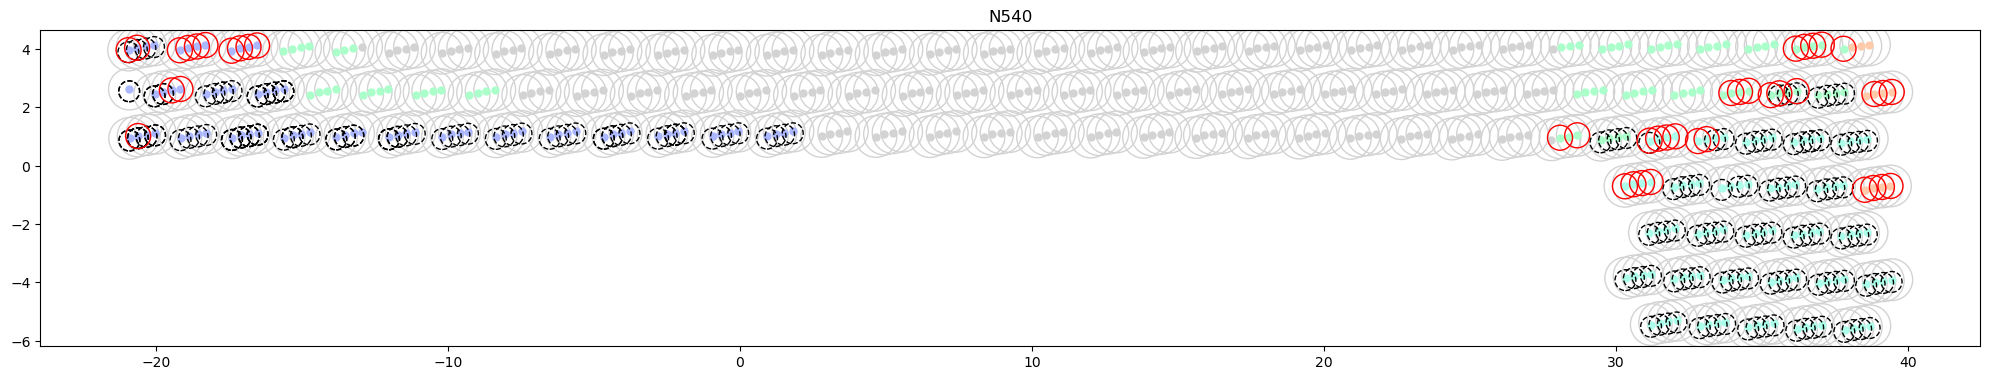

In [36]:
fields = ocat['object'].str.extract(r'(.*?(?=_))')[0]

fig = plt.figure(figsize=(20,4))
ax = plt.subplot(111)
ax.set_aspect('equal')

cc_l = ['#abb7ff','#abffeb','#abffcb','#feffab','#ffcbab','lightgrey']
#['tab:red','tab:blue','tab:green','tab:purple','grey','tab:orange']
#['#abb7ff','#abffeb','#abffcb','#feffab','#ffcbab','lightgrey']

plt.scatter ( wrapRA(hcat['RA']), hcat['dec'], facecolor='None', edgecolor='lightgrey', s=30**2)
for field in fields.unique():
    cat = ocat.loc[fields==field]
    idx = sigjson_f2022b._field_priorities[field]
    plt.scatter ( wrapRA(cat['RA']), cat['dec'], c=cc_l[idx], s=5**2)
    
plt.scatter ( wrapRA(coo_o.merian_sidecar['racenter']), coo_o.merian_sidecar['deccenter'], 
             facecolor='None', edgecolor='k', s=15**2, ls='--' )
#plt.scatter ( wrapRA( ocat.loc[beforelastnight, 'RA'] ), wrapRA(ocat.loc[beforelastnight, 'dec']), facecolor='tab:orange', s=10**2, alpha=0.5 )

#plt.scatter ( wrapRA( ocat.loc[lastnightobjects, 'RA'] ), wrapRA(ocat.loc[lastnightobjects, 'dec']), facecolor='tab:green', s=5**2, alpha=0.5 )


# \\ show pointings that need reobservation
#needs_reobservation = ocat.loc[np.in1d(ocat['object'],reobs)]
#plt.scatter ( wrapRA ( needs_reobservation['RA'] ), wrapRA( needs_reobservation['dec'] ), color='tab:blue', s=15**2 )

going_to_observe['odate'] = going_to_observe.apply(lambda x: x['qstamp'].split("_")[0], axis=1)

#grps = going_to_observe.groupby('odate')
#for idx,(name,grp) in enumerate(grps):
#    cc = plt.cm.Dark2(idx/grps.ngroups)
#    plt.scatter ( wrapRA(ocat.reindex(grp.index)['RA']), ocat.reindex(grp.index)['dec'], facecolor='None', edgecolor=cc, s=18**2, lw=1 )
#    print(grp.shape[0])
plt.scatter ( wrapRA(ocat.reindex(going_to_observe.index)['RA']), ocat.reindex(going_to_observe.index)['dec'], 
             facecolor='None', edgecolor='r', s=18**2, lw=1 )

#plt.axvline(38.)
plt.title('N540')
plt.tight_layout ()
#plt.savefig('/Users/kadofong/Downloads/N540_20220930_prediction.png')

# Copy [OIII] observation to H$\alpha$

In [10]:
#night = halpha_nights[3]
night = [2022, 10, 3]
year = night[0]
month = night[1]
day = night[2]
slot = 2
#lastobs_day = day - 2
print(year,month,day)

2022 10 3


In [11]:
tele = pd.read_csv(tele_fname, index_col=0)
tele_dt = pd.to_datetime(tele['date'])
#lastnight = pd._libs.tslibs.timestamps.Timestamp(year=year, month=month, day=lastobs_day, tz='UTC')

In [12]:
# \\ only allow for OIII footprint
observed_last_night = tele['object'] #.loc[tele_dt.apply(lambda x: x > lastnight),'object']

In [13]:
# \\ need to match OIII planned observations to Halpha catalog

# \\ load N708 & N540 pointings
halpha_locations = coordinates.SkyCoord( hcat['RA'], hcat['dec'], unit=('deg','deg'))
#planned_oiii_obscoords = coordinates.SkyCoord( ocat.reindex(is_queued.loc[is_queued['is_queued']].index)['RA'], 
#                                               ocat.reindex(is_queued.loc[is_queued['is_queued']].index)['dec'], 
#                                               unit=('deg','deg'))

lastnightobjects = np.in1d(ocat['object'], observed_last_night)
#lastnightobjects[np.in1d(ocat.index, going_to_observe.index)] = True

oiii_FLO = coordinates.SkyCoord ( ocat.loc[lastnightobjects, 'RA'],
                                  ocat.loc[lastnightobjects, 'dec'],
                                  unit=('deg','deg') )

# \\ match via coordinates
matchids, sep, _ = oiii_FLO.match_to_catalog_sky ( halpha_locations )
matches = sep < 0.05*u.arcsec

# \\ aggregate all Halpha pointings that are in the OIII queue
nominally_new_inN708 = hcat.index[matchids]
#nominally_new_inN708['qstamp'] = to_obs['qstamp']
# \\ identify which pointings have already been observed in Halpha
already_observed_inN708 = np.in1d(hcat.reindex(nominally_new_inN708)['object'], coo_h.merian_sidecar['object'])
truly_new_inN708 = hcat.reindex(nominally_new_inN708).loc[~already_observed_inN708].copy()
#truly_new_inN708['qstamp'] = is_queued.query('is_queued').loc[~already_observed_inN708, 'qstamp'].values
#truly_new_inN708['object'] = truly_new_inN708['object'].apply ( lambda x: 'OIIIanalog_' + x.split('_')[1] )

# \\ the pointings that "can" be observed should be the truly new in queue
# \\ PLUS XMM pointings, but XMM should be downgraded
hcat_fields = hcat['object'].str.extract(r'(.*?(?=_))')[0]
is_xmm = hcat_fields == 'XMM'
#is_xv = hcat_fields == 'btwnXV'
xmmtogo = hcat.loc[is_xmm].copy ()
xmmtogo['qstamp'] = 'NONE'

hack_cat = pd.concat([truly_new_inN708, xmmtogo])
# \\ remove pointings that are both in XMM and scheduled for 
# \\ OIII observations
hack_cat = hack_cat.loc[~hack_cat.index.duplicated( keep='first')]
hack_cat['qstamp'] = hack_cat['qstamp'].replace(np.NaN, 'NONE')

In [20]:
#is_queued = pd.DataFrame(index=hcat.index, columns=['is_queued','qstamp','airmass'])
halpha_priorities = {'VVDSearly':0, 'VVDSlate':0, 'VVDS':0, 'XMM':100, 'btwnXV':2, 
                     'XMMhigh':4, 'newRAbtwnXV':5}


todaycat = hack_cat

#isqueuedtoday = pd.DataFrame(index=todaycat.index, columns=['is_queued','qstamp','airmass'])      
#isqueuedtoday['is_queued'] = False
dt = f'{night[0]}{night[1]:02d}{night[2]:02d}' #20220920
if not os.path.exists ( f'../json/{dt}'):
    os.mkdir(f'../json/{dt}')
    
stdout = sys.stdout
with open(f'../json/{dt}/output.log','w') as sys.stdout:
    is_queued_halpha = sigjson_f2022b.plan_tomorrow( day, month, year, 
                                                     tele_fname, copilot_fname, 
                                                     mfilt='N708', 
                                                     slot = slot,
                                                     pointings=todaycat,
                                                     is_queued=None,                                                      
                                                     exclude_hour_indices=[5],
                                                     priorities = halpha_priorities,
                                                     pad_last_hour=True, maxairmass=1.9, 
                                                     save=True, verbose=True)
sys.stdout = stdout


In [21]:
# \\ DON'T SHOW PADDED TIME IN FIGURES
is_queued_halpha.loc[is_queued_halpha.loc[is_queued_halpha['qstamp'] == '20221004_08'].iloc[-6:].index, 'qstamp'] = np.NaN 
# \\ I don't think we'll actually get data in hrs 4-5
for hr in [4,5]:
    is_queued_halpha.loc[is_queued_halpha['qstamp']==f'20221004_0{hr}', 'qstamp'] = 'ambi'

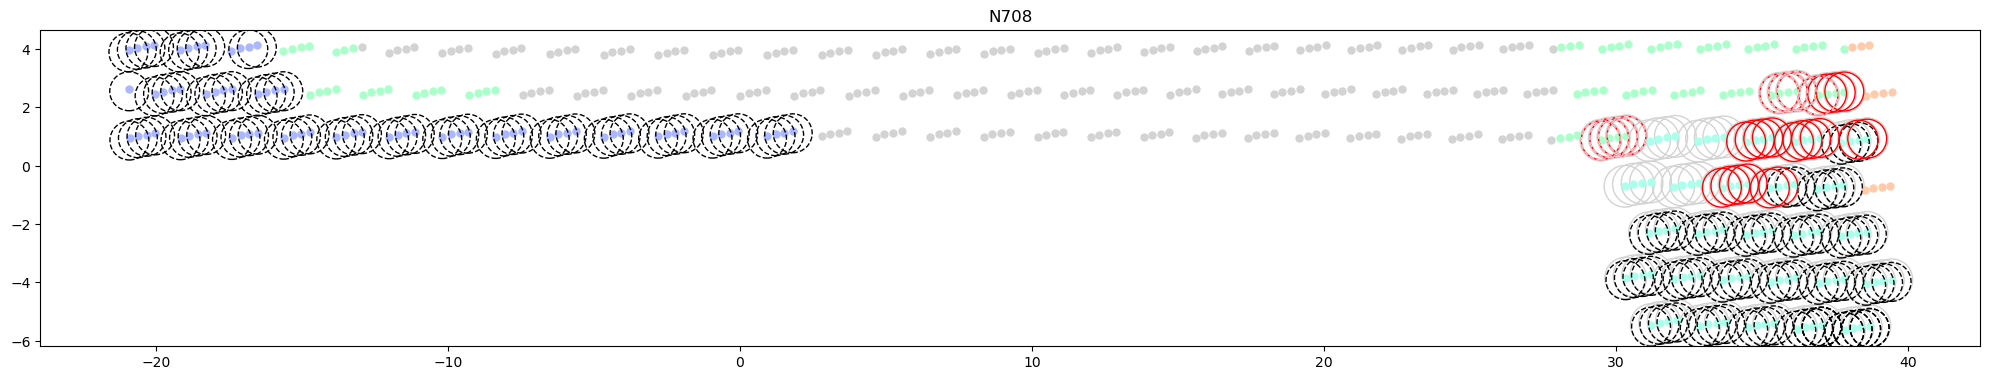

In [22]:
fig = plt.figure(figsize=(20,4))
ax = plt.subplot(111)
ax.set_aspect('equal')

fields = ocat['object'].str.extract(r'(.*?(?=_))')[0]
cc_l = ['#abb7ff','#abffeb','#abffcb','#feffab','#ffcbab','lightgrey']


plt.scatter ( wrapRA(hack_cat['RA']), hack_cat['dec'], facecolor='None', edgecolor='lightgrey', s=30**2)
for field in fields.unique():
    cat = ocat.loc[fields==field]
    idx = sigjson_f2022b._field_priorities[field]
    plt.scatter ( wrapRA(cat['RA']), cat['dec'], c=cc_l[idx], s=5**2)
    
plt.scatter ( wrapRA(coo_h.merian_sidecar['racenter']), 
             coo_h.merian_sidecar['deccenter'], facecolor='None', edgecolor='k', s=28**2, ls='--' )


plt.scatter ( wrapRA(hcat.reindex(is_queued_halpha.loc[~is_queued_halpha['qstamp'].isna()].index)['RA']), 
                     hcat.reindex(is_queued_halpha.loc[~is_queued_halpha['qstamp'].isna()].index)['dec'], 
             facecolor='None', edgecolor='r', s=28**2, lw=1,  )
maybe = is_queued_halpha.query('qstamp=="ambi"')
plt.scatter ( wrapRA(hcat.reindex(maybe.index)['RA']), 
                     hcat.reindex(maybe.index)['dec'], 
             facecolor='None', edgecolor='pink', s=28**2, lw=1, ls='--'  )

#plt.scatter ( wrapRA(truly_new_inN708['RA']), truly_new_inN708['dec'], facecolor='None', edgecolor='r', s=18**2, lw=1 )
#plt.scatter ( wrapRA(ocat.reindex(to_obs.index)['RA']), ocat.reindex(to_obs.index)['dec'], color='b', s=1)

plt.title('N708')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/N708_20221003_prediction.png')